In [1]:
import pandas as pd
import numpy as np
import altair as alt

# Processing

En este notebook se realiza el procesado de los datos para estudiar las diferentes características que se puedan extraer de estos y la preparación de las imagenes para la visualización.

In [2]:
beehives = pd.read_csv("../data/processed/wasp_hives.gzip", compression= "gzip")

In [3]:
beehives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6148 entries, 0 to 6147
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6148 non-null   int64  
 1   action_number           6148 non-null   int64  
 2   date_open               6148 non-null   object 
 3   user                    6148 non-null   object 
 4   town                    6148 non-null   object 
 5   address                 6148 non-null   object 
 6   species                 6148 non-null   object 
 7   location                5977 non-null   object 
 8   altitude                6148 non-null   int64  
 9   diameter                6148 non-null   int64  
 10  easting                 5232 non-null   float64
 11  northing                5232 non-null   float64
 12  state                   6148 non-null   object 
 13  date_close              5941 non-null   object 
 14  agent_close             6148 non-null   

In [6]:
beehives.head()

year  action_number   date_open                  user     town  \
0  2019            214  2019-07-06  AYUNTAMIENTO ABADIÑO  ABADIÑO   
1  2019             22  2019-03-25               BASALAN  ABADIÑO   
2  2019            565  2019-07-20  AYUNTAMIENTO ABADIÑO  ABADIÑO   
3  2019            766  2019-06-08  AYUNTAMIENTO ABADIÑO  ABADIÑO   
4  2019           1081  2019-08-27  AYUNTAMIENTO ABADIÑO  ABADIÑO   

                 address          species      location  altitude  diameter  \
0                 OLALDE  AVISPA ASIÁTICA  CONSTRUCCIÓN         0         1   
1     MCDONALD'S ABADIÑO  AVISPA ASIÁTICA  CONSTRUCCIÓN         8        10   
2     MUNTSARATZ Nº 19 A  AVISPA ASIÁTICA  CONSTRUCCIÓN         4        20   
3  ARRANKURRI KALEA 58    AVISPA ASIÁTICA      ARBOLADO        10        30   
4                SAGASTA  AVISPA ASIÁTICA      ARBOLADO        10        30   

   ...  town_code  town_name aktinidiakiwi arandanos frambuesas  frutales  \
0  ...      48001    Abadiño             0         0          0         0   
1  ...      48001    Abadiño             0         0          0         0   
2  ...      48001    Abadiño             0         0          0         0   
3  ...      48001    Abadiño             0         0          0         0   
4  ...      48001    Abadiño             0         0          0         0   

   manzano  peral  viedodetxakoli  beehives  
0        0      0               0       160  
1        0      0               0       160  
2        0      0               0       160  
3        0      0               0       160  
4        0      0               0       160  

[5 rows x 40 columns]

In [94]:
beehives['date_open'] =pd.to_datetime(beehives.date_open)
source = beehives.groupby(beehives['date_open'].dt.month).year.count()
source = pd.DataFrame(source)
source['mes'] = source.index
source['nidos recogidos'] = source['year']

alt.Chart(source).mark_bar(size=10).encode(
    alt.X('mes',
    scale=alt.Scale(domain=(2, 11))),
    y='nidos recogidos',
).properties(
    width='container',
    height=200
)

alt.Chart(...)

Se observa que abunda la avispa asiática principalmente en los meses de verano.

In [53]:
wasp_vs_beehives = pd.concat([beehives.groupby(beehives['town_name']).beehives.count().rename('Nidos de Avispas'),
           beehives.groupby(beehives['town_name']).beehives.mean().rename('Colmenas de Avejas')], axis=1)

In [56]:
wasp_vs_beehives['Nombre del Pueblo'] = wasp_vs_beehives.index
wasp_vs_beehives

Nidos de Avispas  Colmenas de Avejas  \
town_name                                                                 
Abadiño                                          76                 160   
Abanto y Ciérvana-Abanto Zierbena               139                 161   
Ajangiz                                          31                   0   
Alonsotegi                                       46                 200   
Amorebieta-Etxano                               208                 267   
...                                             ...                 ...   
Zaratamo                                         41                   0   
Zeanuri                                          46                  15   
Zeberio                                          46                   0   
Zierbena                                         32                   0   
Ziortza-Bolibar                                   8                   0   

                                                   Nombre del Pueblo  
town_name                                                             
Abadiño                                                      Abadiño  
Abanto y Ciérvana-Abanto Zierbena  Abanto y Ciérvana-Abanto Zierbena  
Ajangiz                                                      Ajangiz  
Alonsotegi                                                Alonsotegi  
Amorebieta-Etxano                                  Amorebieta-Etxano  
...                                                              ...  
Zaratamo                                                    Zaratamo  
Zeanuri                                                      Zeanuri  
Zeberio                                                      Zeberio  
Zierbena                                                    Zierbena  
Ziortza-Bolibar                                      Ziortza-Bolibar  

[111 rows x 3 columns]

In [59]:
alt.Chart(wasp_vs_beehives).mark_circle(size=60).encode(
    x='Nidos de Avispas',
    y='Colmenas de Avejas',
    tooltip=['Nombre del Pueblo']
).interactive()

alt.Chart(...)

In [9]:
beehives['date_open'] =pd.to_datetime(beehives.date_open)
beehives["date_open_M_y"] = beehives['date_open'].dt.month.astype("str") +"-"+ beehives['date_open'].dt.year.astype("str")
beehives["month"] = beehives['date_open'].dt.month
beehives_sorted = beehives.sort_values(by=['year', 'month'])


In [10]:
beehives_sorted.head(-10)

year  action_number  date_open  \
73    2018            254 2018-01-06   
91    2018           1244 2018-01-08   
187   2018           2120 2018-01-09   
188   2018           2118 2018-01-09   
437   2018           2894 2018-01-10   
...    ...            ...        ...   
5570  2019              3 2019-12-03   
5586  2019           2040 2019-12-11   
5590  2019           2201 2019-12-18   
5591  2019           2203 2019-12-19   
5676  2019           2033 2019-12-11   

                                                user  \
73                                           BASALAN   
91    AYUNTAMIENTO ABANTO Y CIERVANA-ABANTO ZIERBENA   
187   AYUNTAMIENTO ABANTO Y CIERVANA-ABANTO ZIERBENA   
188   AYUNTAMIENTO ABANTO Y CIERVANA-ABANTO ZIERBENA   
437                   AYUNTAMIENTO AMOREBIETA-ETXANO   
...                                              ...   
5570                                         BASALAN   
5586                                         BASALAN   
5590                            AYUNTAMIENTO URDULIZ   
5591                            AYUNTAMIENTO URDULIZ   
5676                      AYUNTAMIENTO URDUÑA-ORDUÑA   

                                   town  \
73                              ABADIÑO   
91    ABANTO Y CIERVANA-ABANTO ZIERBENA   
187   ABANTO Y CIERVANA-ABANTO ZIERBENA   
188   ABANTO Y CIERVANA-ABANTO ZIERBENA   
437                   AMOREBIETA-ETXANO   
...                                 ...   
5570                            URDULIZ   
5586                            URDULIZ   
5590                            URDULIZ   
5591                            URDULIZ   
5676                      URDUÑA-ORDUÑA   

                                                address          species  \
73                                          PIERBURG SA  AVISPA ASIÁTICA   
91                      URBANIZACION MONTELLANO Nº 21-A  AVISPA ASIÁTICA   
187   CARRETERA N-634 PK 129 DIRECCION BILBAO - SANT...  AVISPA ASIÁTICA   
188                                        N.634 PK 129  AVISPA ASIÁTICA   
437                                          MARABI, 31  AVISPA ASIÁTICA   
...                                                 ...              ...   
5570                                   ARABA KALEA 12    AVISPA ASIÁTICA   
5586                     PLENTZIA URDULIZ ERREPIDEA 2    AVISPA ASIÁTICA   
5590                                      ELORTZA AUZOA  AVISPA ASIÁTICA   
5591                               ANTSONEKOA KALEA, 18  AVISPA ASIÁTICA   
5676                         LUGAR BARRIO IBAZURRA 3D    AVISPA ASIÁTICA   

          location  altitude  diameter  ...  aktinidiakiwi  arandanos  \
73    CONSTRUCCIÓN        15        60  ...              0          0   
91    CONSTRUCCIÓN         1        40  ...              0          0   
187       ARBOLADO        11        30  ...              0          0   
188            NaN        25        40  ...              0          0   
437       ARBOLADO        12        30  ...              0          0   
...            ...       ...       ...  ...            ...        ...   
5570      ARBOLADO         5        40  ...              0          3   
5586      ARBOLADO        10        90  ...              0          3   
5590      ARBOLADO         8        50  ...              0          3   
5591      ARBOLADO         1        60  ...              0          3   
5676      ARBOLADO         8        50  ...              0          0   

     frambuesas frutales manzano  peral  viedodetxakoli  beehives  \
73            0        0       0      0               0       160   
91            0        0       0      0               0       161   
187           0        0       0      0               0       161   
188           0        0       0      0               0       161   
437           0        0       0      0               0       267   
...         ...      ...     ...    ...             ...       ...   
5570          0       15       0      0               0       

In [11]:
beehives_town = beehives.groupby("normalized_town")[["longitude", "latitude", "aktinidiakiwi", 	"arandanos", 	"frambuesas", 	"frutales", 	"manzano", 	"peral", 	"viedodetxakoli", 	"beehives"]].agg(pd.Series.median).reset_index()

In [12]:
beehives_town

normalized_town  longitude   latitude  aktinidiakiwi  \
0                          abadino  -2.609115  43.153079              0   
1    abantoyciervanaabantozierbena  -3.079891  43.316467              0   
2                          ajangiz  -2.666140  43.307818             15   
3                       alonsotegi  -2.990149  43.243192              0   
4                 amorebietaetxano  -2.728708  43.220092              0   
..                             ...        ...        ...            ...   
106                       zaratamo  -2.870145  43.215656              0   
107                        zeanuri  -2.764823  43.111755              3   
108                        zeberio  -2.850654  43.151990              1   
109                       zierbena  -3.087723  43.348174              4   
110                 ziortzabolibar  -2.938433  43.280470              0   

     arandanos  frambuesas  frutales  manzano  peral  viedodetxakoli  beehives  
0            0           0         0        0      0               0       160  
1            0           0         0        0      0               0       161  
2            0           0        17        1      0               3         0  
3            0           0         7        0      0               1       200  
4            0           0         0        0      0               0       267  
..         ...         ...       ...      ...    ...             ...       ...  
106          0           0         8        0      0               0         0  
107          0           0        64        5      0               2        15  
108          0           0        70        5      0               5         0  
109          0           0        13        0      0               0         0  
110          0           0        21       11      0               0         0  

[111 rows x 11 columns]

In [18]:
fig = px.scatter_mapbox(beehives_sorted, lat="latitude", lon="longitude",
                        #animation_frame = "normalized_town",
                        #color = "normalized_town",
                        hover_name="town",
                        opacity =  0.45,                   
                        zoom=10, height=600)

In [16]:
! pip install plotly

In [19]:
#Arreglar
import plotly.express as px
import plotly

instances = ["aktinidiakiwi", 	"arandanos", 	"frambuesas", 	"frutales", 	"manzano", 	"peral", 	"viedodetxakoli", 	"beehives"]
for i in instances:
    fig = px.scatter_mapbox(beehives_sorted, lat="latitude", lon="longitude",
                        #animation_frame = "normalized_town",
                        #color = "normalized_town",
                        hover_name="town",
                        opacity =  0.45,                   
                        zoom=10, height=600)

    fig2 = px.scatter_mapbox(beehives_town, lat="latitude", lon="longitude",
                        size = i,
                        #animation_frame = "normalized_town",
                        #color = "normalized_town",
                        hover_name="normalized_town",
                        color_discrete_sequence=px.colors.qualitative.Light24,
                        opacity =  0.75,                    
                        zoom=10, height=600)

    fig.add_trace(fig2.data[0])

    fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=9, mapbox_center_lat = 43.2,
    margin={"r":0,"t":0,"l":0,"b":0})

    fig.show()

In [20]:
import plotly.express as px
import plotly

fig = px.scatter_mapbox(beehives_sorted, lat="latitude", lon="longitude",
                        #animation_frame = "normalized_town",
                        #color = "normalized_town",
                        hover_name="town",                    
                        zoom=10, height=600)

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=9, mapbox_center_lat = 43.2,
    #margin={"r":0,"t":0,"l":0,"b":0}
    )

fig.show()

In [21]:
import plotly.express as px
import plotly

fig = px.scatter_mapbox(beehives_sorted, lat="latitude", lon="longitude",
                        animation_frame = "normalized_town",
                        #color = "normalized_town",
                        hover_name="town",                    
                        zoom=10, height=600)

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=9, mapbox_center_lat = 43.2,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [22]:
import plotly.express as px
import plotly

fig = px.scatter_mapbox(beehives_sorted, lat="latitude", lon="longitude",
                        animation_frame = "date_open_M_y",
                        #color = "town",
                        hover_name="town",                    
                        zoom=10, height=600)

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=9, mapbox_center_lat = 43.2,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()
plotly.offline.plot(fig, filename='yup.html')


'yup.html'

<AxesSubplot:xlabel='date_open'>

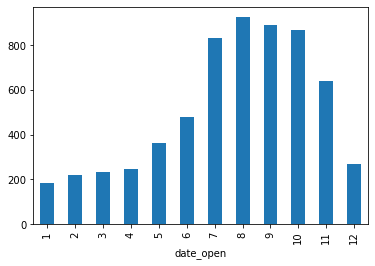

In [23]:
beehives.groupby(beehives['date_open'].dt.month).year.count().plot(kind="bar")

# OLD habra que eliminar

In [ ]:
stations_info = pd.read_csv("https://kopuru.com/wp-content/uploads/2021/02/LOCALIZACION-ESTACIONES-METEOROLOGICAS.csv", delimiter=";")
stations_info.sample(10)

CODIGO  ESTACION TIPO    XUTM     YUTM  cota (m)
34   C032     Areta    A  505261  4776081       122
15   C00A   Kanpezu    M  553957  4724980       550
68   C0B2  Zaratamo    A  509930  4785225        65
24   C051   Saratxo    A  499947  4764668       230
64   C022   Urkiola    M  528860  4772196       709
57   C072    Orduña    M  497059  4759050       934
81   C084   Behobia    A  600410  4799770         5
7    C034    Espejo    M  496749  4739452       504
47   C036   Iurreta    M  530732  4780526       175
20   C060   Páganos    M  532903  4712079       577

In [ ]:
api_beehives = pd.read_csv("https://kopuru.com/wp-content/uploads/2021/02/APICULTURA_COLMENAS_KOPURU.csv", delimiter=";")
api_beehives.head(10)

NOMBRE MUNICIPIO     CP  CODIGO MUNICIPIO  NUM_COLMENAS
0       Alonsotegi  48810             48912            40
1       Alonsotegi  48810             48912            80
2       Alonsotegi  48810             48912            80
3        Balmaseda  48800             48090            40
4        Balmaseda  48800             48090            40
5         Sopuerta  48190             48086            35
6         Sopuerta  48190             48086            15
7        Balmaseda  48800             48090            18
8           Güeñes  48820             48045            80
9           Güeñes  48820             48045            55

In [ ]:
fruit_trees = pd.read_csv("https://kopuru.com/wp-content/uploads/2021/02/FRUTALES-DECLARADOS-KOPURU.csv", delimiter=";")
fruit_trees.sample(10)

PRODUCTODES_C  CODIGO MUNICIPIO NOMBRE LOCALIDAD
2369  VI•EDO DE TXAKOLI             48020           Bilbao
638   VI•EDO DE TXAKOLI             48040           Gatika
3211           FRUTALES             48096            Zalla
4082  VI•EDO DE TXAKOLI             48066            Morga
1076           FRUTALES             48009     Arrankudiaga
3106  VI•EDO DE TXAKOLI             48907        Kortezubi
3886           FRUTALES             48914          Arratzu
30             FRUTALES             48905          Zamudio
812            FRUTALES             48009     Arrankudiaga
515            FRUTALES             48009     Arrankudiaga

In [ ]:
beehives = pd.read_csv("https://www.opendatabizkaia.eus/es/dump/d3aa5662-95a9-4f08-b254-b44a230014db/datos-nidos-avispa-asiatica?format=csv", index_col="_id")
beehives.head(10)

URTEA/ANIO  ...  ITXIERAKO AGENTEA_CAS/AGENTE CIERRE_CAS
_id              ...                                         
1          2019  ...                                 BOMBEROS
2          2019  ...                                  BASALAN
3          2019  ...                                 BOMBEROS
4          2019  ...                                 BOMBEROS
5          2019  ...                                 BOMBEROS
6          2019  ...                                 BOMBEROS
7          2019  ...                                 BOMBEROS
8          2019  ...                                 BOMBEROS
9          2019  ...                                 BOMBEROS
10         2019  ...                                 BOMBEROS

[10 rows x 18 columns]

In [24]:
beehives["month"] = pd.to_datetime(beehives["ALTA_DATA/FECHA ALTA"]).apply(lambda x: x.month)

KeyError: 'ALTA_DATA/FECHA ALTA'

Quizas agrupendolo por municipio y año? 

In [25]:
beehives.groupby("month")["JARDUERA_ZENBAKIA/NUM_ACTUACION"].count().plot(kind="bar")

KeyError: 'Column not found: JARDUERA_ZENBAKIA/NUM_ACTUACION'

In [26]:
beehives.groupby("URTEA/ANIO")["JARDUERA_ZENBAKIA/NUM_ACTUACION"].count().plot(kind="bar")

KeyError: 'URTEA/ANIO'

In [27]:
beehives.groupby("URTEA/ANIO")["JARDUERA_ZENBAKIA/NUM_ACTUACION"].count()

KeyError: 'URTEA/ANIO'

In [28]:
beehives.groupby(["UDALERRIA/MUNICIPIO", "URTEA/ANIO", "month"])["JARDUERA_ZENBAKIA/NUM_ACTUACION"].count().reset_index()

KeyError: 'UDALERRIA/MUNICIPIO'

In [29]:
beehives_by_town = beehives.groupby(["UDALERRIA/MUNICIPIO", "URTEA/ANIO", "month"])["JARDUERA_ZENBAKIA/NUM_ACTUACION"].count().reset_index().groupby(["UDALERRIA/MUNICIPIO","URTEA/ANIO"])["JARDUERA_ZENBAKIA/NUM_ACTUACION"].sum().unstack()
beehives_by_town

KeyError: 'UDALERRIA/MUNICIPIO'

In [30]:
beehives_by_town["UDALERRIA/MUNICIPIO"].unique().size

NameError: name 'beehives_by_town' is not defined